<a href="https://colab.research.google.com/github/Bhargavvv412/house-price-prediction/blob/main/House_Price_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [310]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [311]:
train_df = pd.read_csv('/content/drive/MyDrive/Dataset/house/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Dataset/house/test.csv')

In [312]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: >

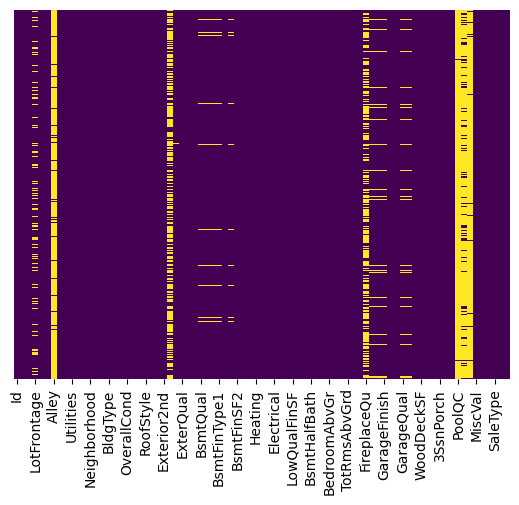

In [313]:
sns.heatmap(train_df.isnull(), yticklabels=False ,cbar=False,cmap='viridis')

In [314]:
from os import replace
df = train_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Id', 'MoSold', 'YrSold', 'Utilities'])

<Axes: >

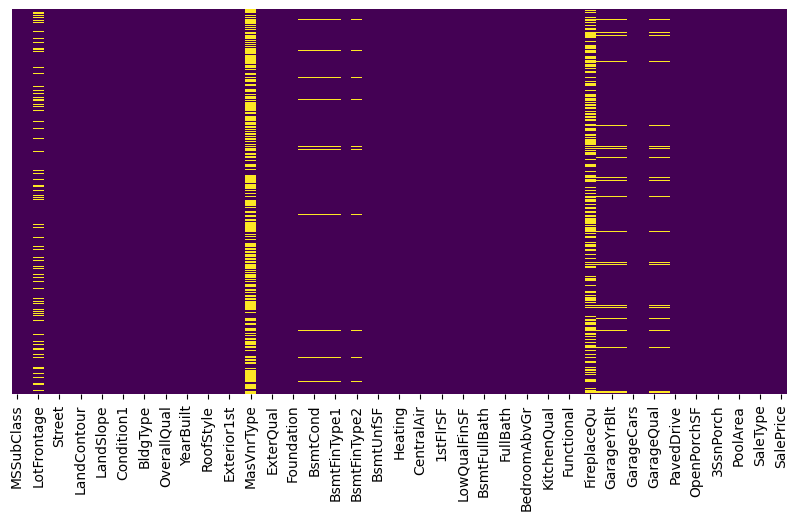

In [315]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels=False ,cbar=False,cmap='viridis')

In [316]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0,61,0,0,0,0,0,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,298,0,0,0,0,0,0,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,0,42,0,0,0,0,0,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,0,35,272,0,0,0,0,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,192,84,0,0,0,0,0,WD,Normal,250000


In [317]:
from sklearn.preprocessing import LabelEncoder

In [318]:
encoder = LabelEncoder()

In [319]:
# Replace all missing values in your DataFrame with -1
df = df.fillna(-1)
print("Missing values remaining:", df.isnull().sum().sum())
df.info()

Missing values remaining: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-

In [320]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [321]:
# Define categorical columns
categorical_columns = [
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
    'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PavedDrive', 'SaleType', 'SaleCondition'
]

category_mappings = {}

for col in categorical_columns:
    df[col] = df[col].replace(-1, "MISSING_PLACEHOLDER")

    codes, mapping = pd.factorize(df[col], sort=True)

    if "MISSING_PLACEHOLDER" in mapping:
        missing_code = list(mapping).index("MISSING_PLACEHOLDER")
        codes = np.where(codes == missing_code, -1, codes)

    df[col] = codes

    category_mappings[col] = {}
    for idx, category in enumerate(mapping):
        if category == "MISSING_PLACEHOLDER":
            category_mappings[col]["-1"] = -1  # Map to -1
        else:
            category_mappings[col][category] = idx

    print(f"\nMapping for {col}:")
    for category, code in category_mappings[col].items():
        print(f"  {category}: {code}")


Mapping for MSZoning:
  C (all): 0
  FV: 1
  RH: 2
  RL: 3
  RM: 4

Mapping for Street:
  Grvl: 0
  Pave: 1

Mapping for LotShape:
  IR1: 0
  IR2: 1
  IR3: 2
  Reg: 3

Mapping for LandContour:
  Bnk: 0
  HLS: 1
  Low: 2
  Lvl: 3

Mapping for LotConfig:
  Corner: 0
  CulDSac: 1
  FR2: 2
  FR3: 3
  Inside: 4

Mapping for LandSlope:
  Gtl: 0
  Mod: 1
  Sev: 2

Mapping for Neighborhood:
  Blmngtn: 0
  Blueste: 1
  BrDale: 2
  BrkSide: 3
  ClearCr: 4
  CollgCr: 5
  Crawfor: 6
  Edwards: 7
  Gilbert: 8
  IDOTRR: 9
  MeadowV: 10
  Mitchel: 11
  NAmes: 12
  NPkVill: 13
  NWAmes: 14
  NoRidge: 15
  NridgHt: 16
  OldTown: 17
  SWISU: 18
  Sawyer: 19
  SawyerW: 20
  Somerst: 21
  StoneBr: 22
  Timber: 23
  Veenker: 24

Mapping for Condition1:
  Artery: 0
  Feedr: 1
  Norm: 2
  PosA: 3
  PosN: 4
  RRAe: 5
  RRAn: 6
  RRNe: 7
  RRNn: 8

Mapping for Condition2:
  Artery: 0
  Feedr: 1
  Norm: 2
  PosA: 3
  PosN: 4
  RRAe: 5
  RRAn: 6
  RRNn: 7

Mapping for BldgType:
  1Fam: 0
  2fmCon: 1
  Duplex: 2

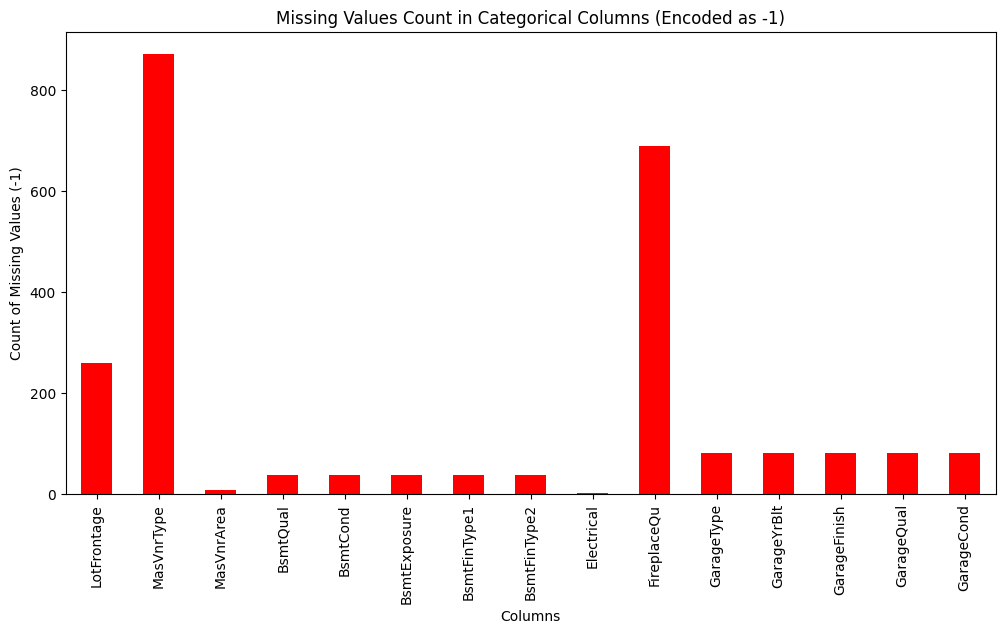

In [322]:
# 🔹 Plot Graph for Missing Values
plt.figure(figsize=(12, 6))
missing_values = (df == -1).sum()  # Count of -1 values (i.e., missing data)
missing_values[missing_values > 0].plot(kind='bar', color='red')
plt.title("Missing Values Count in Categorical Columns (Encoded as -1)")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values (-1)")
plt.xticks(rotation=90)
plt.show()

In [323]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,4,0,5,...,0,61,0,0,0,0,0,8,4,208500
1,20,3,80.0,9600,1,3,3,2,0,24,...,298,0,0,0,0,0,0,8,4,181500
2,60,3,68.0,11250,1,0,3,4,0,5,...,0,42,0,0,0,0,0,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,6,...,0,35,272,0,0,0,0,8,0,140000
4,60,3,84.0,14260,1,0,3,2,0,15,...,192,84,0,0,0,0,0,8,4,250000


In [324]:
df['MasVnrType'].value_counts()

,count
MasVnrType,
-1,872
1,445
3,128
0,15


In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   LotConfig      1460 non-null   int64  
 8   LandSlope      1460 non-null   int64  
 9   Neighborhood   1460 non-null   int64  
 10  Condition1     1460 non-null   int64  
 11  Condition2     1460 non-null   int64  
 12  BldgType       1460 non-null   int64  
 13  HouseStyle     1460 non-null   int64  
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [326]:
import pandas as pd
import numpy as np

# Define relationships for imputation
impute_relations = {
    'LotFrontage': ['Neighborhood'],
    'GarageYrBlt': ['YearBuilt'],
    'MasVnrArea': ['MasVnrType'],
    'BsmtQual': ['Foundation'],
    'FireplaceQu': ['Fireplaces'],
    'GarageArea': ['GarageType', 'GarageCars']
}

# Impute using relationships
for col, related_cols in impute_relations.items():
    if col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            df[col] = df.groupby(related_cols)[col].transform(lambda x: x.fillna(x.median()))
        else:
            df[col] = df.groupby(related_cols)[col].transform(lambda x: x.fillna(x.mode()[0]))

# Fallback imputation
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype in ['int64', 'float64']:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

# Replace NaNs with -1 (optional)
df = df.replace(np.nan, -1)

# Verify no missing values remain
print("Remaining missing values:", df.isnull().sum().sum())

Remaining missing values: 0
